# MARKET BASKET ANLAYSIS

(Using Apriori algorithm in mlxtend library)
"Market basket analysis scrutinizes the products customers tend to buy together, and uses the information to decide which products should be cross-sold or promoted together"

•Market basket is performed on transactional data at customer level. Its part of unsupervised learning hence requires minimum data wrangling and feature engingeering.
•Output consists of a set of rules which define associations between products bought based on lift, confidence level and support
•This analysis will be performed through Apriori algorithm within mlxtend package which is downloaded to python
•MBA is used for store layouts, promotions, cross selling, disocunt policy, online recommendation engines, spare parts ordering and click stream tracking
•Association rules are written as : {A} =>{B} where A = Antecedent and B= Consequent and the rule shows that there is a relationship between A and B based on Lift, confidence level and support that customers have bought these two products frequently in one transaction

# Support
Support in our use case refers to the popularity of a movie and it is calculated as the number of times a movie is watched divided by the total number of transactions.
For instance if out of a total population of 100 people, 20 watched Thor, the support can be calculated as:
Support(Thor) = (Transactions containing The Thor)/(Total Transactions)
Support(Thor) = 20/100 = 20%
https://medium.com/@fabio.italiano/the-apriori-algorithm-in-python-expanding-thors-fan-base-501950d55be9
•	Support: It is calcuated as: No.of transaction containing a rule/total number of transactions. It could be higher if you want to establish if this is really strong relationshiop and lower if you want to find hidden relationship. Higher the support means that these are popular combination of products which customers buy frequently.


# Confidence
Confidence refers to the is the likelihood of people also buying Thor if they watch the Avengers. It can be calculated by finding the number of transactions where Thor and Avengers were bought together, divided by the total number of transactions where Avengers is bought or rented.
Confidence(Avengers → Thor) = (Transactions containing both (Thor and The Avengers))/(Transactions containing Avengers)
If we had 8 transactions where customers watched Thor and Avengers, while in 20 transactions, Avengers is purchased or rented, then we can find the likelihood of buying Thor if Avengers is bought.
Confidence(Avengers → Thor) = 8/20 = 40%
https://medium.com/@fabio.italiano/the-apriori-algorithm-in-python-expanding-thors-fan-base-501950d55be9
•	Confidence: This measures the probability of occurance of transactions for consequent product and shows how much a consequent product depends on antecedent product. 50% confidence level means that that if a customer buying product A, there are 50% chances they would also buy product B. So B's dependency on product A is 50%


# Lift
Lift(Thor -> Avengers) refers to the increase in the ratio of the sale of Thor when Avengers is sold. It can be calculated by dividing Confidence(Thor -> Avengers) divided by Support(Thor). Mathematically it can be represented as:
Lift(Thor → Avengers) = (Confidence (Avengers → Thor))/(Support (Thor))
It can be calculated as:
Lift(Lift → Avengers) = 40%/20% = 2
Lift basically tells us that the likelihood of buying a Thor and Avengers together is 2 times more than the likelihood of just buying the Thor.
A Lift of 1 means there is no association between products. Lift of greater than 1 means that products are more likely to be bought together.
https://medium.com/@fabio.italiano/the-apriori-algorithm-in-python-expanding-thors-fan-base-501950d55be9
•	Lift: Predicts the strength of a relationship. Lift = 1 means the rule is completely independent i.e. consequent product doesn't depend on antecedent product whereas Lift>1 means consequent product strongly depends on antecedent product. Lift calculates how much in times the actual rule is higher than the estimated probabaility.Lift is how often the condition actually happened compared to the estimated chance for that to happen.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import mlxtend as ml

In [2]:
#Dataset
Project2Dashboard = pd.read_csv("Project2Dashboard.csv")

In [3]:
#Top 10 records
Project2Dashboard.head(10)

,SalesOrderNumber,OrderQuantity,UnitPrice,ProductStandardCost,Profit,SalesAmount,OrderDate,YearOrderDate,MonthOrderDate,DayOrderDate,...,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance
0,SO55673,1,2384.07,1481.9379,902.1321,2384.07,04/04/2013,2013,4,4,...,S,M,70000,0,0,Partial College,Skilled Manual,0,2,0-1 Miles
1,SO55685,1,4.99,1.8663,3.1237,4.99,05/04/2013,2013,4,5,...,M,M,60000,2,2,Bachelors,Professional,1,1,2-5 Miles
2,SO55709,1,4.99,1.8663,3.1237,4.99,05/04/2013,2013,4,5,...,M,F,100000,2,0,Bachelors,Management,1,2,0-1 Miles
3,SO55710,1,4.99,1.8663,3.1237,4.99,05/04/2013,2013,4,5,...,M,F,30000,5,0,Partial High School,Clerical,0,2,10+ Miles
4,SO55718,1,21.98,8.2205,13.7595,21.98,05/04/2013,2013,4,5,...,S,F,80000,5,4,Partial College,Professional,1,2,5-10 Miles
5,SO55740,1,2319.99,1265.6195,1054.3705,2319.99,06/04/2013,2013,4,6,...,M,F,40000,0,0,Graduate Degree,Clerical,1,0,0-1 Miles
6,SO52922,1,2319.99,1265.6195,1054.3705,2319.99,17/02/2013,2013,2,17,...,M,M,70000,4,0,Bachelors,Management,1,2,1-2 Miles
7,SO52922,1,4.99,1.8663,3.1237,4.99,17/02/2013,2013,2,17,...,M,M,70000,4,0,Bachelors,Management,1,2,1-2 Miles
8,SO52932,1,4.99,1.8663,3.1237,4.99,18/02/2013,2013,2,18,...,M,F,60000,1,0,Partial College,Skilled Manual,1,1,5-10 Miles
9,SO52940,1,4.99,1.8663,3.1237,4.99,18/02/2013,2013,2,18,...,M,M,110000,5,3,Partial College,Professional,0,4,2-5 Miles


In [4]:
#Bottom 10 records
Project2Dashboard.tail()

,SalesOrderNumber,OrderQuantity,UnitPrice,ProductStandardCost,Profit,SalesAmount,OrderDate,YearOrderDate,MonthOrderDate,DayOrderDate,...,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance
60393,SO71379,1,8.99,6.9223,2.0677,8.99,23/11/2013,2013,11,23,...,M,F,120000,2,4,Bachelors,Management,1,3,5-10 Miles
60394,SO71396,1,34.99,13.0863,21.9037,34.99,23/11/2013,2013,11,23,...,M,M,10000,2,0,Partial College,Manual,1,0,1-2 Miles
60395,SO71473,1,2319.99,1265.6195,1054.3705,2319.99,24/11/2013,2013,11,24,...,S,F,80000,2,0,High School,Skilled Manual,1,2,5-10 Miles
60396,SO71481,1,34.99,13.0863,21.9037,34.99,24/11/2013,2013,11,24,...,S,F,50000,4,0,Bachelors,Management,0,2,1-2 Miles
60397,SO71488,1,34.99,13.0863,21.9037,34.99,25/11/2013,2013,11,25,...,S,M,100000,1,0,Graduate Degree,Management,0,0,0-1 Miles


In [5]:
# checking the random entries in the data

Project2Dashboard.sample(10)

,SalesOrderNumber,OrderQuantity,UnitPrice,ProductStandardCost,Profit,SalesAmount,OrderDate,YearOrderDate,MonthOrderDate,DayOrderDate,...,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance
53207,SO74818,1,28.99,10.8423,18.1477,28.99,19/01/2014,2014,1,19,...,M,F,40000,1,1,Graduate Degree,Skilled Manual,1,0,1-2 Miles
14342,SO52213,1,2294.99,1251.9813,1043.0087,2294.99,04/02/2013,2013,2,4,...,M,M,20000,1,1,Partial College,Manual,1,0,2-5 Miles
17143,SO56570,1,4.99,1.8663,3.1237,4.99,21/04/2013,2013,4,21,...,S,M,30000,0,0,Partial College,Clerical,1,1,2-5 Miles
57795,SO72539,1,49.99,38.4923,11.4977,49.99,07/12/2013,2013,12,7,...,S,F,20000,1,0,Graduate Degree,Clerical,0,0,0-1 Miles
29087,SO66652,1,769.49,419.7784,349.7116,769.49,19/09/2013,2013,9,19,...,S,F,20000,0,0,Partial High School,Manual,0,2,1-2 Miles
41081,SO58295,1,2.29,0.8565,1.4335,2.29,20/05/2013,2013,5,20,...,M,F,80000,4,4,Graduate Degree,Management,1,1,0-1 Miles
55001,SO70575,1,2384.07,1481.9379,902.1321,2384.07,11/11/2013,2013,11,11,...,M,M,10000,0,0,Graduate Degree,Manual,0,0,0-1 Miles
40492,SO60908,1,54.99,20.5663,34.4237,54.99,26/06/2013,2013,6,26,...,M,F,110000,2,4,Graduate Degree,Management,0,1,2-5 Miles
20970,SO56744,1,742.35,461.4448,280.9052,742.35,24/04/2013,2013,4,24,...,M,M,30000,1,0,Bachelors,Clerical,1,0,0-1 Miles
51352,SO72142,1,21.98,8.2205,13.7595,21.98,02/12/2013,2013,12,2,...,S,M,40000,0,0,Graduate Degree,Clerical,1,0,0-1 Miles


In [6]:
# let's describe the dataset

Project2Dashboard.describe()

,OrderQuantity,UnitPrice,ProductStandardCost,Profit,SalesAmount,YearOrderDate,MonthOrderDate,DayOrderDate,YearDueDate,MonthDueDate,DayDueDate,YearShipDate,MonthShipDate,DayShipDate,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned
count,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.00000,60398.000000,60398.000000,60398.000000
mean,1.0,486.086911,286.065657,200.021253,486.086911,2012.902298,6.963012,15.651048,2012.939832,6.899848,15.856866,2012.922829,6.944319,15.716547,59715.056790,1.85074,1.080317,0.690404,1.509189
std,0.0,928.489892,552.457641,378.959898,928.489892,0.477666,3.410799,8.788711,0.504944,3.452633,8.813643,0.489763,3.433206,8.778415,33065.426837,1.62107,1.585964,0.462331,1.154163
min,1.0,2.290000,0.856500,1.433500,2.290000,2010.000000,1.000000,1.000000,2011.000000,1.000000,1.000000,2011.000000,1.000000,1.000000,10000.000000,0.00000,0.000000,0.000000,0.000000
25%,1.0,7.950000,2.973300,3.123700,7.950000,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000,2013.000000,4.000000,8.000000,30000.000000,0.00000,0.000000,0.000000,1.000000
50%,1.0,29.990000,11.216300,15.643700,29.990000,2013.000000,7.000000,16.000000,2013.000000,7.000000,16.000000,2013.000000,7.000000,16.000000,60000.000000,2.00000,0.000000,1.000000,2.000000
75%,1.0,539.990000,294.579700,196.340400,539.990000,2013.000000,10.000000,23.000000,2013.000000,10.000000,24.000000,2013.000000,10.000000,23.000000,80000.000000,3.00000,2.000000,1.000000,2.000000
max,1.0,3578.270000,2171.294200,1487.835600,3578.270000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,170000.000000,5.00000,5.000000,1.000000,4.000000


In [7]:
# Shapes of dataframes
print("Project2Dashboard:", Project2Dashboard.shape)

Project2Dashboard: (60398, 37)


# Data Cleaning

In [8]:
Project2Dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 37 columns):
SalesOrderNumber                 60398 non-null object
OrderQuantity                    60398 non-null int64
UnitPrice                        60398 non-null float64
ProductStandardCost              60398 non-null float64
Profit                           60398 non-null float64
SalesAmount                      60398 non-null float64
OrderDate                        60398 non-null object
YearOrderDate                    60398 non-null int64
MonthOrderDate                   60398 non-null int64
DayOrderDate                     60398 non-null int64
Order Date Yearly-Monthly        60398 non-null object
DueDate                          60398 non-null object
YearDueDate                      60398 non-null int64
MonthDueDate                     60398 non-null int64
DayDueDate                       60398 non-null int64
Due Date Yearly-Monthly          60398 non-null object
ShipDate      

In [9]:
#Missing values
Project2Dashboard.isnull().sum()

SalesOrderNumber                 0
OrderQuantity                    0
UnitPrice                        0
ProductStandardCost              0
Profit                           0
SalesAmount                      0
OrderDate                        0
YearOrderDate                    0
MonthOrderDate                   0
DayOrderDate                     0
Order Date Yearly-Monthly        0
DueDate                          0
YearDueDate                      0
MonthDueDate                     0
DayDueDate                       0
Due Date Yearly-Monthly          0
ShipDate                         0
YearShipDate                     0
MonthShipDate                    0
DayShipDate                      0
Ship Date Yearly-Monthly         0
SalesTerritoryRegion             0
SalesTerritoryCountry            0
EnglishProductName               0
EnglishProductSubcategoryName    0
EnglishProductCategoryName       0
BirthDate                        0
MaritalStatus                    0
Gender              

In [10]:
Project2Dashboard['EnglishProductSubcategoryName']= Project2Dashboard['EnglishProductSubcategoryName'].fillna(Project2Dashboard['EnglishProductSubcategoryName'].mode().iloc[0])

In [11]:
Project2Dashboard[Project2Dashboard['OrderQuantity']<0].head()

,SalesOrderNumber,OrderQuantity,UnitPrice,ProductStandardCost,Profit,SalesAmount,OrderDate,YearOrderDate,MonthOrderDate,DayOrderDate,...,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance


In [12]:
Project2Dashboard = Project2Dashboard[Project2Dashboard['OrderQuantity']>0]
Project2Dashboard.shape

(60398, 37)

# Exploratory data analysis (EDA)
We will now look at top selling products and would graph them for better visualisation

In [13]:
Project2Dashboard['EnglishProductSubcategoryName'].value_counts().iloc[:10]

Tires and Tubes      17332
Road Bikes            8068
Bottles and Cages     7981
Helmets               6440
Mountain Bikes        4970
Jerseys               3332
Caps                  2190
Touring Bikes         2167
Fenders               2121
Gloves                1430
Name: EnglishProductSubcategoryName, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

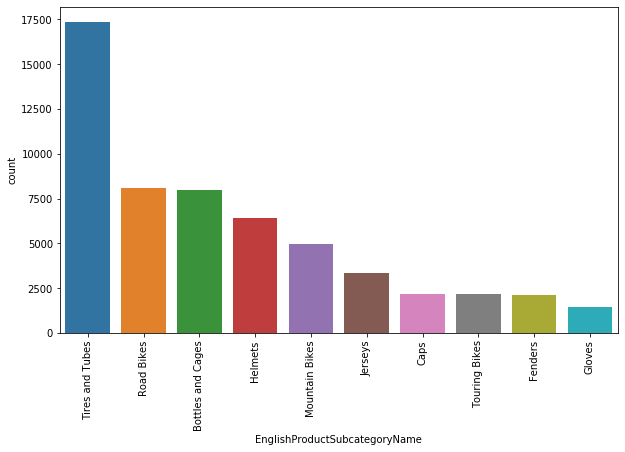

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'EnglishProductSubcategoryName', data = Project2Dashboard,
              order = Project2Dashboard['EnglishProductSubcategoryName'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

Checking geographic data

In [15]:
country_set = Project2Dashboard[['SalesTerritoryCountry', 'SalesOrderNumber']]
country_set = country_set.pivot_table(columns='SalesTerritoryCountry', aggfunc='count')
country_set.sort_values('SalesOrderNumber', axis=1, ascending=False).T

,SalesOrderNumber
SalesTerritoryCountry,
United States,21344
Australia,13345
Canada,7620
United Kingdom,6906
Germany,5625
France,5558


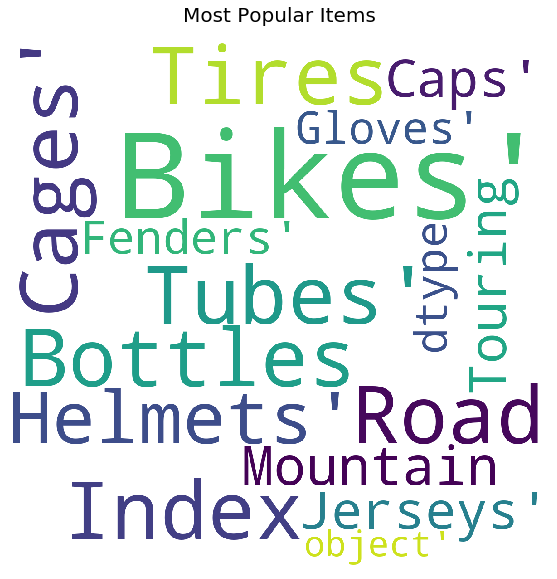

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,
                      height = 1200,
                      max_words = 121).generate(str(Project2Dashboard['EnglishProductSubcategoryName'].value_counts().iloc[:10].index))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

Frequency of most popular products

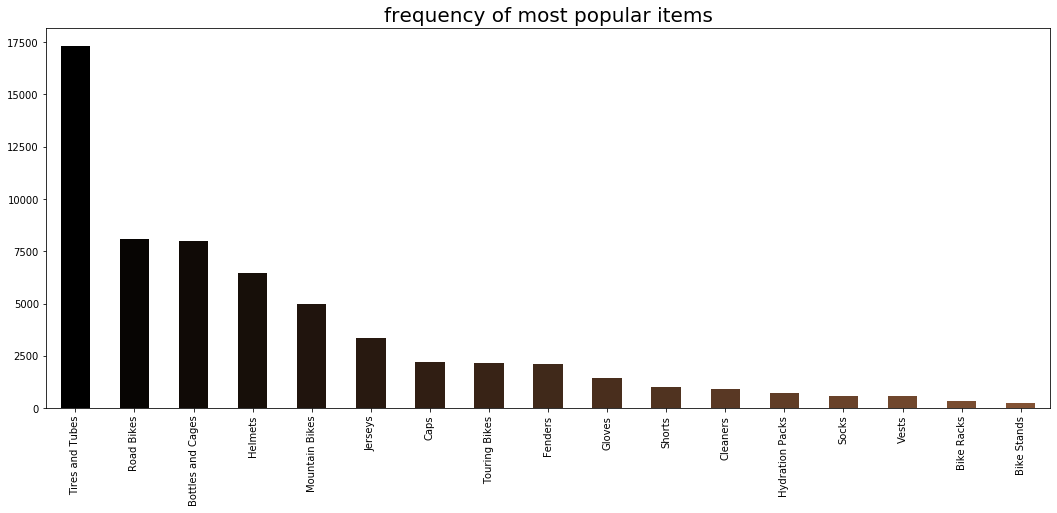

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
Project2Dashboard['EnglishProductSubcategoryName'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

# Applying Apriori Algorithm¶
Apriori algorithm expects data to be in a one-hot-encoded pandas dataframe. We need to consolidate data by InvoiceNo where each row will have a unique invoice number and the columns will consist of the whole product range where each bought product will be encoded as 1 and nil sales products will be encoded as 0. 
Please remember we have already eliminated refund (negative) values which would otherwise be coded as 0 

In [18]:
basket = (Project2Dashboard[Project2Dashboard['SalesTerritoryCountry'] =="United Kingdom"]
 .pivot_table(index="SalesOrderNumber", columns="EnglishProductSubcategoryName", values="OrderQuantity", aggfunc = "sum", fill_value =0))

In [19]:
basket.head(n=5)

EnglishProductSubcategoryName,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
SalesOrderNumber,,,,,,,,,,,,,,,,,
SO43708,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43714,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43721,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43722,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43729,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Applying one hot encoding

In [20]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

EnglishProductSubcategoryName,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
SalesOrderNumber,,,,,,,,,,,,,,,,,
SO43708,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43714,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43721,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43722,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
SO43729,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Setting parameters for algorithm
Minimum Support selected is 7%. You can increase the value to 10% or above for better accuracy however that could end up producing less number of rules
The criteria would be: ** Building frequent products using Apriori and building the rules with association_rules**

In [21]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.181128,(Bottles and Cages)
1,0.108875,(Caps)
2,0.268558,(Helmets)
3,0.124381,(Jerseys)
4,0.200264,(Mountain Bikes)
5,0.314088,(Road Bikes)
6,0.367865,(Tires and Tubes)
7,0.098647,(Touring Bikes)
8,0.111514,"(Helmets, Tires and Tubes)"


Generating rules by lift and confidence
min_threshhold=1 as otherwise the products will be indepedent to other

In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Helmets),(Tires and Tubes),0.268558,0.367865,0.111514,0.415233,1.128765,0.012721,1.081003
1,(Tires and Tubes),(Helmets),0.367865,0.268558,0.111514,0.303139,1.128765,0.012721,1.049624


# Explanation Example
Fro first rule, Alarm clock bakelike pink =>Alarm clcok bakelike green
Support =7.3% which means this rule is appearing in 7.5% of the whole dataset
Confidence =72.5% which means both products were bought 72.5% times ogether if a customer buys pink alarm clock
Lift = 7.4 which means the presence of pink alarm clock in a transaction will increase the probability of having green alarm clock in the same transaction by 7.4 times 
Lift formula = support/support(A)*support(B)

Building rules by playing around with a higher lift and confidence level
Pandas dataframes make it easy to filter the results further. Lets set the new rules by setting following parameters:
at least 2 antecedents
a confidence level of over 30%
a lift score of voer 1.1

In [23]:
rules['antecedent_len'] = rules['antecedents'].apply(lambda x:len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Helmets),(Tires and Tubes),0.268558,0.367865,0.111514,0.415233,1.128765,0.012721,1.081003,1
1,(Tires and Tubes),(Helmets),0.367865,0.268558,0.111514,0.303139,1.128765,0.012721,1.049624,1


In [24]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.30) &
       (rules['lift'] > 1.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Helmets),(Tires and Tubes),0.268558,0.367865,0.111514,0.415233,1.128765,0.012721,1.081003,1
1,(Tires and Tubes),(Helmets),0.367865,0.268558,0.111514,0.303139,1.128765,0.012721,1.049624,1


In [25]:
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-RHQE0PFG\MSSQLSERVER01;"
                      "Database=AdventureWorksDW2016;"
                      "Trusted_Connection=yes;")


#Import Factinternetsales
import pandas as pd
fctintsales = pd.read_sql_query("""
SELECT
[ProductKey]
,avg([SalesAmount]) AS Avg_Sales
,max([SalesAmount]) AS Max_Sales
FROM [dbo].[FactInternetSales] group by [ProductKey] """, conn)

In [26]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [27]:
df = pd.read_sql_query('SELECT * FROM [dbo].[MBA_TABLE]', conn)

In [28]:
df.head()

,SalesOrderNumber,OrderDate,OrderQuantity,EnglishProductSubcategoryName,SalesAmount,CustomerKey
0,SO43723,2011-01-04,1,Road Bikes,699.0982,14520
1,SO43726,2011-01-05,1,Road Bikes,699.0982,14560
2,SO43743,2011-01-09,1,Mountain Bikes,3399.9900,11007
3,SO43756,2011-01-12,1,Road Bikes,699.0982,19941
4,SO43775,2011-01-16,1,Mountain Bikes,3399.9900,11027


In [29]:
basket = (df
          .groupby(['SalesOrderNumber', 'EnglishProductSubcategoryName'])['OrderQuantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('SalesOrderNumber'))

In [30]:
basket.head()

EnglishProductSubcategoryName,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
SalesOrderNumber,,,,,,,,,,,,,,,,,
SO43697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
SO43698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
SO43699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
SO43700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
SO43701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
#basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [32]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottles and Cages),(Caps),0.172385,0.079179,0.023139,0.134228,1.695259,0.009490,1.063584
1,(Caps),(Bottles and Cages),0.079179,0.172385,0.023139,0.292237,1.695259,0.009490,1.169340
2,(Bottles and Cages),(Fenders),0.172385,0.076684,0.014173,0.082215,1.072126,0.000953,1.006026
3,(Fenders),(Bottles and Cages),0.076684,0.172385,0.014173,0.184818,1.072126,0.000953,1.015252
4,(Gloves),(Bottles and Cages),0.051701,0.172385,0.012148,0.234965,1.363024,0.003235,1.081800


In [34]:
rules[ (rules['lift'] >= 0.5) &
       (rules['confidence'] >= 0.1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottles and Cages),(Caps),0.172385,0.079179,0.023139,0.134228,1.695259,0.009490,1.063584
1,(Caps),(Bottles and Cages),0.079179,0.172385,0.023139,0.292237,1.695259,0.009490,1.169340
3,(Fenders),(Bottles and Cages),0.076684,0.172385,0.014173,0.184818,1.072126,0.000953,1.015252
4,(Gloves),(Bottles and Cages),0.051701,0.172385,0.012148,0.234965,1.363024,0.003235,1.081800
6,(Helmets),(Bottles and Cages),0.232836,0.172385,0.043422,0.186491,1.081826,0.003284,1.017339
7,(Bottles and Cages),(Helmets),0.172385,0.232836,0.043422,0.251888,1.081826,0.003284,1.025467
9,(Hydration Packs),(Bottles and Cages),0.026501,0.172385,0.011967,0.451569,2.619535,0.007399,1.509059
10,(Bottles and Cages),(Jerseys),0.172385,0.120467,0.023573,0.136745,1.135123,0.002806,1.018856
11,(Jerseys),(Bottles and Cages),0.120467,0.172385,0.023573,0.195678,1.135123,0.002806,1.028960
12,(Mountain Bikes),(Bottles and Cages),0.179688,0.172385,0.034275,0.190744,1.106502,0.003299,1.022687


In [35]:
#just get back product cost and list price
products_short=fctintsales

In [36]:
#rename ProductKey as ProductID as need to join tables
products_short=products_short.rename(columns={"ProductKey": "ProductID"})

In [37]:
#take a look
products_short.head()

,ProductID,Avg_Sales,Max_Sales
0,593,564.99,564.99
1,355,2319.99,2319.99
2,570,742.35,742.35
3,378,2443.35,2443.35
4,384,1120.49,1120.49


In [38]:
products_short.dtypes

ProductID      int64
Avg_Sales    float64
Max_Sales    float64
dtype: object

In [40]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-RHQE0PFG\MSSQLSERVER01;"
                      "Database=AdventureWorksDW2016;"
                      "Trusted_Connection=yes;")
                     
#Import Factinternetsales
import pandas as pd
fctintsales = pd.read_sql_query("""
SELECT
[ProductKey]
,avg([SalesAmount]) AS Avg_Sales
,max([SalesAmount]) AS Max_Sales
FROM [dbo].[FactInternetSales] group by [ProductKey] """, conn)

#lets assume from the top 10 recommendations presented to each customer, 1 item is bought each year and costs the average 
#price of the top 10 recommendations

#we need to find the cost of the top 10 recommendations first